In [34]:
import sqlalchemy as sql
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import chart_studio.plotly as plotly
import plotly.graph_objects as go
from networkx_viewer import Viewer
import nx_altair as nxa
from pyvis.network import Network

In [5]:

df_edges = pd.read_csv("data/marvel-unimodal-edges.csv", delimiter = ",")
df_nodes = pd.read_csv("data/marvel-unimodal-nodes.csv", delimiter = ",")

In [6]:
df_nodes.head()

,Id,Label
0,Black Panther / T'chal,Black Panther / T'chal
1,Loki [asgardian],Loki [asgardian]
2,Mantis / ? Brandt,Mantis / ? Brandt
3,Iceman / Robert Bobby,Iceman / Robert Bobby
4,Marvel Girl / Jean Grey,Marvel Girl / Jean Grey


In [7]:
df_edges.head()

,Source,Target,Weight
0,Black Panther / T'chal,Loki [asgardian],10
1,Black Panther / T'chal,Mantis / ? Brandt,23
2,Black Panther / T'chal,Iceman / Robert Bobby,12
3,Black Panther / T'chal,Marvel Girl / Jean Grey,10
4,Black Panther / T'chal,Cyclops / Scott Summer,14


AttributeError: 'Graph' object has no attribute 'node'

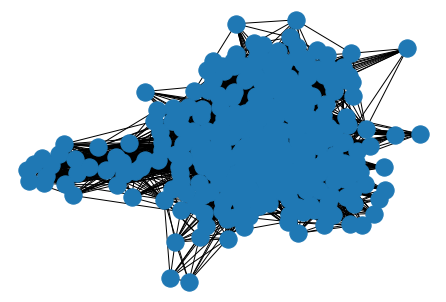

In [23]:
G = nx.Graph()
#Adiciona os nós
for i, r in df_nodes.iterrows():
    G.add_node(r["Id"])

#Faz uma tupla com as arestas
edges_tuple = [(r["Source"], r["Target"]) for i, r in df_edges.iterrows()]
G.add_edges_from(edges_tuple)
nx.draw(G)

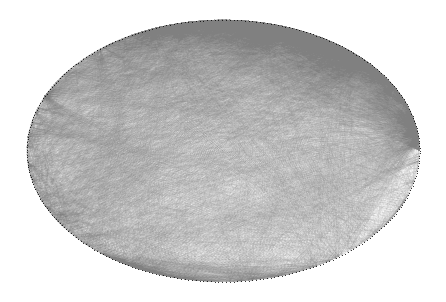

In [9]:
options = {
    "node_color": "black",
    "node_size": 1,
    "edge_color": "gray",
    "linewidths": 0,
    "width": 0.04,
}
nx.draw_circular(G, **options)

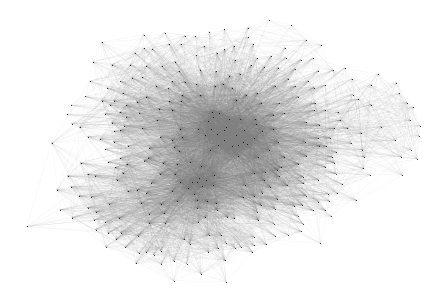

In [117]:
nx.draw_kamada_kawai(G, **options)

In [113]:
#Cria o grafo usando pyvis
marvel_net = Network(height="1250px", width="100%", bgcolor="#ffffff", font_color="black")
marvel_net.barnes_hut()

#Popula o grafo com nós e peso
sources = df_edges['Source']
targets = df_edges['Target']
weights = df_edges['Weight']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    
    marvel_net.add_node(src, src, title=src)
    marvel_net.add_node(dst, dst, title=dst)
    marvel_net.add_edge(src, dst, value=w)

neighbor_map = marvel_net.get_adj_list()

for node in marvel_net.nodes:
    node["title"] += " Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    node["value"] = len(neighbor_map[node["id"]])

#Personilização do grafo
marvel_net.toggle_physics(True)
marvel_net.set_options(''' var options = {
  "nodes": {
    "font": {
      "size": 20,
      "face": "tahoma",
      "strokeWidth": 3
    },
    "shapeProperties": {
      "borderDashes": false
    }
  },
  "edges": {
    "color": {
      "inherit": true
    },
    "font": {
      "face": "tahoma"
    },
    "smooth": false
  },
  "interaction": {
    "hover": true,
    "keyboard": {
      "enabled": true
    },
    "multiselect": true,
    "navigationButtons": true
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -85550,
      "centralGravity": 0.2,
      "springLength": 250,
      "springConstant": 0.001
    },
    "minVelocity": 0.75,
    "timestep": 0.2
  }
}
''')

#Gerando o html
marvel_net.show("marvel.html")


In [ ]:
#Utiliza a biblioteca networkx_viewer para abrir o grafo em uma GUI interativa

app = Viewer(G)
app.mainloop()

# Esse trecho foi inserido no trabalho mais como curiosidade para mostrar essa biblioteca. Nesse GUI é possível mover os nós,
# escondê-los, filtrá-los e outros.